<a href="https://colab.research.google.com/github/yadavrahyl2k15/flight-prediction/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Depending on data predict flight price.

Import all useful modules and library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data=pd.read_excel("/content/drive/MyDrive/1..Flight_Price-->> Machine Learning/Data_Train.xlsx")

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


1.Deal with missing values

In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As there is 2 misiing values in dataset so we can drop it.

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
def change_to_datetime(col):                                                            #function to convert date obect into datetime format.
  train_data[col]=pd.to_datetime(train_data[col])

In [ ]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_to_datetime(i)

In [ ]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

To convert date of journey into day,month and year as it is easy for ML model to understand features.

In [ ]:
train_data["Journey_Day"]=train_data['Date_of_Journey'].dt.day
train_data['Journey_Month']=train_data['Date_of_Journey'].dt.month


In [ ]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-01-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-01-27 05:50:00,2021-01-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-01-27 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-01-27 18:05:00,2021-01-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-01-27 16:50:00,2021-01-27 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2021-01-27 09:00:00,2021-01-27 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2021-01-27 18:55:00,2021-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2021-01-27 08:00:00,2021-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2021-01-27 08:55:00,2021-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2021-01-27 11:25:00,2021-01-27 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [ ]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-01-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-01-27 05:50:00,2021-01-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-01-27 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-01-27 18:05:00,2021-01-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-01-27 16:50:00,2021-01-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


Also we have to convert time into minute and hour to make ML understand.

In [ ]:
def extract_hour(df,col):                                         #function to take hour from time
  df[col+"_hour"]=df[col].dt.hour
def extract_minute(df,col):                                       #function to take minute from time
  df[col+"_minute"]=df[col].dt.minute
def drop_column(df,col):                                          #function to drop column
  df.drop(col,axis=1,inplace=True)

In [ ]:
for i in ['Dep_Time','Arrival_Time']:                                 #loop to take out month and day from times
  extract_hour(train_data,i)
  extract_minute(train_data,i)
  drop_column(train_data,i)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


we have to convert duration into hour minute as in data one is missing several time.so we use split.

In [ ]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
  if(len(duration[i].split(" "))==2):
    pass
  else:
    if 'h' in duration[i]:
      duration[i]=duration[i] +' 0m'
    else:
      duration[i]="0h "+ duration[i]


In [ ]:
train_data['Duration']=duration
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Now extract hour and minute from duration.


In [ ]:
'2h 50m'.split(" ")[1][0:-1]	

'50'

In [ ]:
def hour(x):
  return x.split(" ")[0][0:-1]
def minute(x):
  return x.split(" ")[1][0:-1]

In [ ]:
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_minute']=train_data['Duration'].apply(minute)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
drop_column(train_data,'Duration')

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

converting object data into interger type

In [ ]:
train_data['Duration_hour']=train_data['Duration_minute'].astype(int)
train_data['Duration_minute']=train_data['Duration_minute'].astype(int)


In [ ]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int64
Duration_minute         int64
dtype: object

To find categorical and continous data.

In [ ]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
continous_col=[col for col in train_data.columns if train_data[col].dtype!='O']
continous_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute']

Handle categorical data:-

1.   norminal categorical data-one hot encoding
2.   ordinal categorical data-label encoding 



In [ ]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

find realtionship between airline and price.

In [ ]:
import seaborn as sns

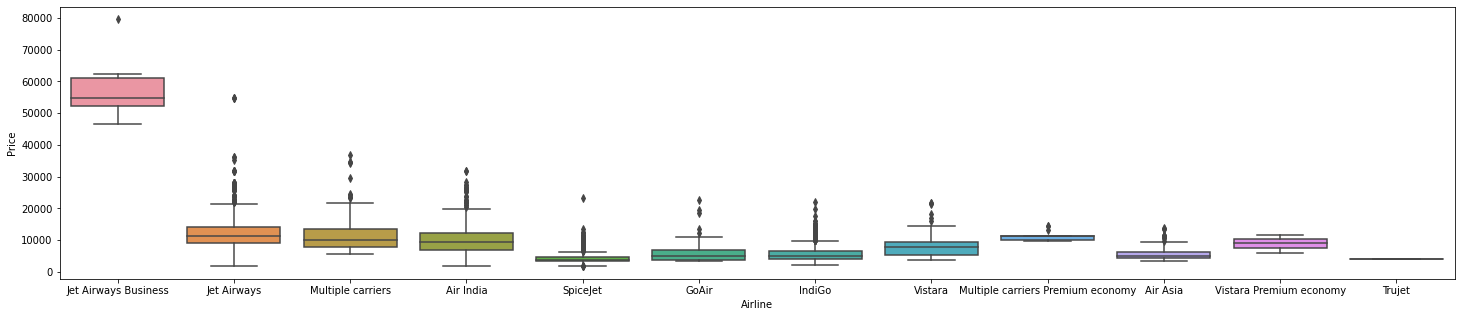

In [ ]:
plt.figure(figsize=(25,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [ ]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


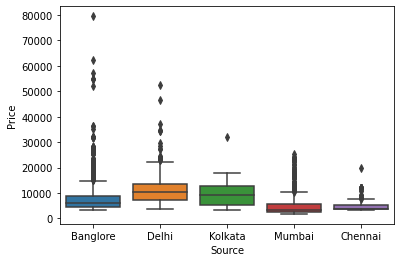

In [ ]:
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [ ]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


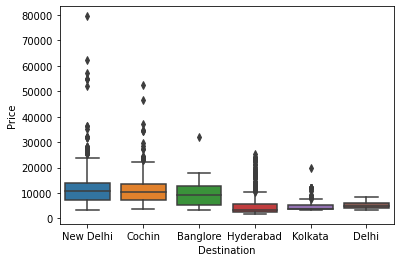

In [ ]:
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [ ]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
categorical['Route_1']=categorical['Route'].str.split("→").str[0]
categorical['Route_2']=categorical['Route'].str.split("→").str[1]
categorical['Route_3']=categorical['Route'].str.split("→").str[2]
categorical['Route_4']=categorical['Route'].str.split("→").str[3]
categorical['Route_5']=categorical['Route'].str.split("→").str[4]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
drop_column(categorical,"Route")
categorical.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [ ]:
for i in ['Route_3','Route_4','Route_5']:
  categorical[i].fillna('None',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
categorical.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [ ]:
for i in categorical.columns:
  print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


we cant perform hot endcoding in routes as there are many categories so we use label endcoder.to get rid of high dimensionality we use labelencoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
  categorical[i]=encoder.fit_transform(categorical[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [ ]:
categorical['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
drop_column(categorical,'Additional_Info')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dict={'non-stop':0, 
      '2 stops': 2, 
      '1 stop': 1, 
      '3 stops': 3, 
      '4 stops' :4}

In [ ]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


now concat all features

In [ ]:
data=pd.concat([categorical,Destination,Source,Airline,train_data[continous_col]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3897,24,3,22,20,1,10,50,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,7662,5,1,5,50,13,15,25,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,13882,6,9,9,25,4,25,0,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,6218,5,12,18,5,23,30,25,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13302,3,1,16,50,21,35,45,45


In [ ]:
drop_column(data,"Airline")
drop_column(data,'Source')
drop_column(data,'Destination')

In [ ]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3897,24,3,22,20,1,10,50,50
1,2,2,25,1,3,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,7662,5,1,5,50,13,15,25,25
2,2,3,32,4,5,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,13882,6,9,9,25,4,25,0,0
3,1,2,34,3,13,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,6218,5,12,18,5,23,30,25,25
4,1,0,34,8,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13302,3,1,16,50,21,35,45,45


In [ ]:
data.shape

(10682, 35)

In [ ]:
pd.set_option("display.max_columns",35)                      #to see all columns of data 
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3897,24,3,22,20,1,10,50,50
1,2,2,25,1,3,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,7662,5,1,5,50,13,15,25,25
2,2,3,32,4,5,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,13882,6,9,9,25,4,25,0,0
3,1,2,34,3,13,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,6218,5,12,18,5,23,30,25,25
4,1,0,34,8,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13302,3,1,16,50,21,35,45,45


Dealing with outliers


In [ ]:
def plot(df,col):
  FIG,(ax1,ax2)=plt.subplots(2,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


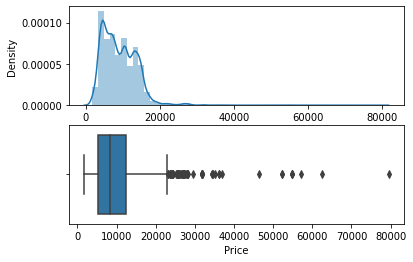

In [ ]:
plot(data,'Price')

In [ ]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data["Price"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


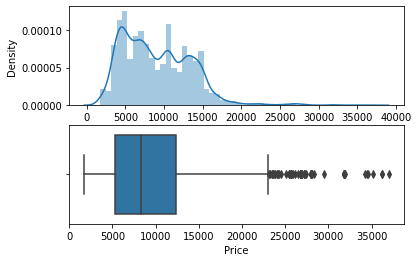

In [ ]:
plot(data,'Price')

SEPARATE INDEPENDENT AND DEPENDENT FEATURES

In [ ]:
x=data.drop('Price',axis=1)
y=data['Price']

best feature having god relation with traget using information gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif                                #to calculate information gain
mutual_info_classif(x,y)

array([2.17432145, 2.02161826, 2.8248737 , 2.31491121, 1.46232866,
       0.68886283, 1.54183197, 0.40122888, 0.28571018, 0.16968826,
       0.37776662, 0.17101695, 1.517399  , 0.883295  , 0.28844582,
       0.75234018, 0.09845376, 0.67510848, 0.9434904 , 0.01384149,
       0.55459028, 0.0250006 , 0.30621395, 0.        , 0.22171202,
       0.        , 1.04121424, 0.88564895, 1.42130419, 1.21191058,
       1.8296393 , 1.55448846, 1.04411688, 1.08744968])

In [ ]:
importance=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

In [ ]:
importance.columns=['IMPORTANCE']
importance.sort_values(by='IMPORTANCE',ascending=False)

,IMPORTANCE
Route_2,2.786986
Route_3,2.270943
Total_Stops,2.150917
Route_1,2.015663
Arrival_Time_hour,1.860641
Delhi,1.557996
Cochin,1.554458
Arrival_Time_minute,1.530883
Route_4,1.509835
Dep_Time_hour,1.420995


Divide data into train,test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Generate a function to get all values of evry model

In [ ]:
from sklearn import metrics
def predict(ml_model):
  model=ml_model.fit(x_train,y_train)
  print("Training score {}".format(model.score(x_train,y_train)))
  predictions=model.predict(x_test)
  print("Prediction are {}".format(predictions))
  print('/n')
  r2_score=metrics.r2_score(y_test,predictions)
  print("r2 score {}".format(r2_score))

  print('MAE:',metrics.mean_absolute_error(y_test,predictions))
  print('MSE:',metrics.mean_squared_error(y_test,predictions))
  print('RMSE:',np.sqrt(metrics.median_absolute_error(y_test,predictions)))
  sns.distplot(y_test-predictions)


use first randomforestregressor

Training score 0.9549683656598443
Prediction are [ 3511.35466667 16112.11166667 11894.98       ...  7459.82
  9751.36        7661.128     ]
/n
r2 score 0.8171264743453767
MAE: 1126.739604263334
MSE: 3426423.2177306903
RMSE: 23.003912710667294


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


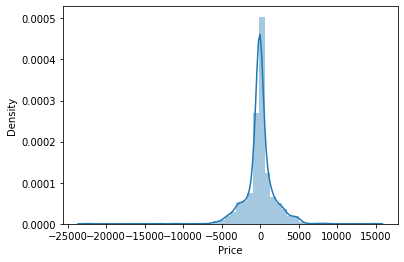

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score 0.6137231418412767
Prediction are [ 3568.32224804 15233.31000153 14402.04863841 ...  7797.95904653
  7232.62408192  6904.07364686]
/n
r2 score 0.6240477308964716
MAE: 1918.9805562983802
MSE: 7044057.246688181
RMSE: 38.013209797604596


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


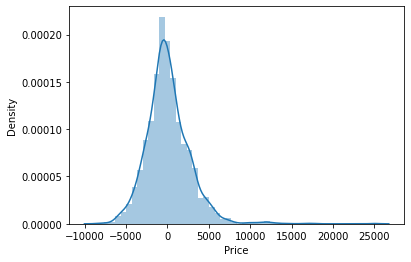

In [ ]:
predict(LinearRegression())

Training score 0.7710754512303815
Prediction are [ 3989.  14813.  12725.  ...  8390.2  7676.8  7124.2]
/n
r2 score 0.6787920378179728
MAE: 1669.1135236312589
MSE: 6018336.527393543
RMSE: 33.766847646767395


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


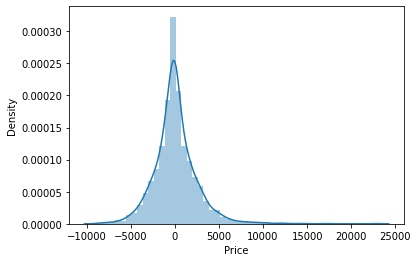

In [ ]:
predict(KNeighborsRegressor())

Training score 0.9680030273191352
Prediction are [ 3311. 15654. 11087. ...  7480. 10156.  7754.]
/n
r2 score 0.7463187158613078
MAE: 1241.3885119326158
MSE: 4753117.974649691
RMSE: 21.77154105707724


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


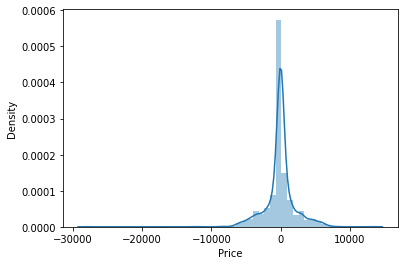

In [ ]:
predict(DecisionTreeRegressor())

Hyperparameter approach

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
n_estimator= [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]


In [ ]:
random_grid={
           'n_estimators':n_estimator ,
           'max_features': ['auto','sqrt'],
           'max_depth': max_depth,      
           'min_samples_split':[5,10,50,100]
}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
ref_rg=RandomForestRegressor()

In [ ]:
rf_random=RandomizedSearchCV(estimator=ref_rg,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 540}

In [ ]:
prediction=rf_random.predict(x_test)

In [ ]:
metrics.r2_score(y_test,prediction)               #it increase accuracy of model as compare to above regression model

0.8337939611268741